In [1]:
import numpy as np

import pandas as pd
# from pandas.tools.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import time

%load_ext autoreload
%autoreload 2

# 1 Univariate Linear Regression

In [2]:
file_path_1 = '../course_materials/ex1data1.txt'

## 1.1 Data Visualisation

In [3]:
df = pd.read_csv(file_path_1, header = None)
n_samples, n_variables = df.shape
print(f"\tsample # {n_samples}\n\tvariables # {n_variables}")
df.head()

	sample # 97
	variables # 2


,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


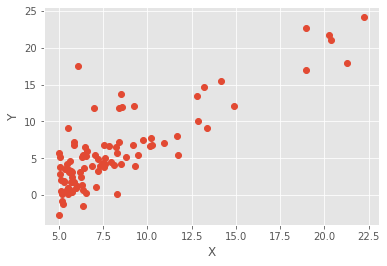

In [4]:
Xs = df.iloc[:, :1]
Ys = df.iloc[:, 1:2]
plt.plot(Xs, Ys, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 1.2 Data Extraction and Transformation

In [5]:
def get_data(file_path):
    data = np.loadtxt(file_path, delimiter = ',')
    n_samples, n_variables = data.shape
#     matrix of variables X(n, k), where n is n_samples, and k is n_variables, including the intercept
    X = np.insert(data[:, :-1], 0, 1, axis=1)
#     vector of response y(n, 1), where n is n_samples
    y = data[:, -1:]
#     vector of coefficients β(k, 1), where k is n_variables, including the intercept
    β = np.zeros((n_variables,1))
    return β, X, y

In [7]:
β, X, y = get_data(file_path_1)

## 1.3 Linear Regression

### 1.3.1 Computing Parameters Analytically
**Coefficient Matrix** can be calculated as follows 
$$\beta = (X^T\cdot X)^{-1}\cdot X^T\cdot y$$

**X** is a matrix of variables with a first column of dummy variables as intercept (column of ones).
**y** is a vector of responses.
$\theta$ is a vector of coefficients in the linear regression model.

In [8]:
# Computing Parameters Analytically
def linear_regression_analytical(X, y):
#     β vector (2, 1), vector of coefficients
    β = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return β

### 1.3.2 Computing Parameters Using Gradient Descent & Linear Algebra

#### Vector Representation of the Regression Problem
Variables matrix X:
$$
X = \begin{bmatrix}
x_{1,1} & \ldots & x_{1,j} \\
\ldots & \ldots & \ldots \\
x_{n,1} & \ldots & x_{n,j}\\
\end{bmatrix}
$$

Variables marix X, after adding a column of ones as intercepts:
$$
X = \begin{bmatrix}
1 & x_{1,1} & \ldots & x_{1,k} \\
1 & \ldots & \ldots & \ldots \\
1 & x_{n,1}& \ldots & x_{n,k}\\
\end{bmatrix}
$$

Response vector Y:
$$
Y =
\begin{bmatrix}
y_1\\
\ldots\\
y_n\\
\end{bmatrix}
$$

Coefficients vector $\beta$:
$$
\beta =
\begin{bmatrix}
\beta_1\\
\ldots\\
\beta_k\\
\end{bmatrix}
$$

**Hypothesis** $h_{\beta}(X) =  X\cdot\beta$

**Error** $e = (h_{\beta}(X) - y)$

**Cost Function** $J = \frac{1}{2n}{\sum(h_{\beta} - y)^2}$

**Gradient** $\frac{\partial J}{\partial \beta} = \frac{1}{n}X^{T}\cdot e$<br\>

In the code $\frac{\partial J}{\partial \beta}$ is denoted symply as **g**.


In [9]:
def get_hypothesis(β, X):
#     return hypothesis vector h(n, 1), where n is n_samples
    return np.dot(X, β)

def cost_function(β, X, y):
    n_samples, n_variables = X.shape
#     hypothesis vector h(n, 1)
    h = get_hypothesis(β, X)
#     cost scalar J(1, 1)
    J = np.sum((y-h)**2)/(2*n_samples)
#     similarly, cost J can be calculated using dot-product
#     J = np.dot((y-h).T, y-h)/(2*n_samples)
#     technically, the result is an array (1,1) rather than a float
    return J

def get_gradient_descent(β, X, y, α, iterations):
    n_samples, n_variables = X.shape
    J_history = []
    for i in range(iterations):
#         hypothesis vector h(n, 1)
        h = get_hypothesis(β, X)
#         error vector e(n, 1)
        e = h - y
#         cost scalar J
        J = cost_function(β, X, y)
#         gradient vector g(k, 1)
        g = np.dot(X.T, e)/(n_samples)
#         updated β vector β(k, 1)
        β = β - α*g
#         updated J_history
        J_history += [J] 
    return β, J_history

## 1.4 Results Visulisation & Analysis

In [10]:
def plot_regression(β, X, y):  
#     y_fit = β_fit[0][0] + β_fit[1][0]*X[:,1:]
    y_fit = np.dot(X,β_fit)
    
    MSE = np.sum((y - y_fit)**2)/y.shape[0]
    
    plt.plot(X[:,1:], y, 'o', X[:,1:], y_fit, '-')
    plt.xlabel("X")
    plt.ylabel("Y")
    print (
        f"\tβ_0 {β_fit[0][0]:.5f}\n",
        f"\tβ_1 {β_fit[1][0]:.5f}\n",
        f"\tY = {β_fit[0][0]:.2f} + {β_fit[1][0]:.2f} * X\n"
        f"\tMSE {MSE:.2}")
    return plt.show()

def plot_convergence(J_history, iterations):
    plt.plot(np.arange(1, iterations + 1), J_history, '-')
    plt.xlabel("iterations")
    plt.ylabel("J (cost)")
    plt.show()

### 1.4.1 Analytical Approach

	β_0 -3.89578
 	β_1 1.19303
 	Y = -3.90 + 1.19 * X
	MSE 9.0


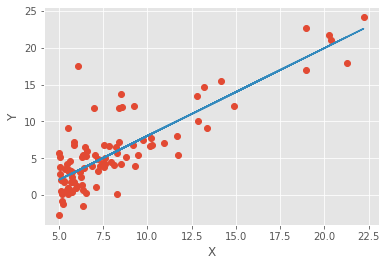

In [11]:
β_fit = linear_regression_analytical(X, y)
plot_regression(β_fit, X, y)

### 1.4.2 Gradient-Descent Approach

	β_0 -3.24140
 	β_1 1.12729
 	Y = -3.24 + 1.13 * X
	MSE 9.0


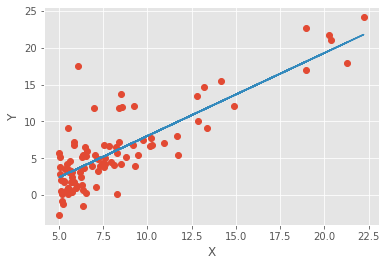

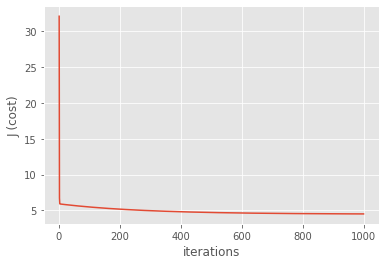

In [13]:
# setting learning rate (α)
α = 0.01
iterations = 1000

β_fit = get_gradient_descent(β, X, y, α, iterations)[0]
plot_regression(β_fit, X, y)
costVector = get_gradient_descent(β, X, y, α, iterations)[1]
plot_convergence(costVector, iterations)

/Users/nikita/Documents/andrew-ng-2-python/.venv_andrew_ng_2_python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/nikita/Documents/andrew-ng-2-python/.venv_andrew_ng_2_python/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/Users/nikita/Documents/andrew-ng-2-python/.venv_andrew_ng_2_python/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


[28.10934410357117, 10.199564153888034, 5.859428582746157, 5.4412597614266875, 4.503182748795932, nan]


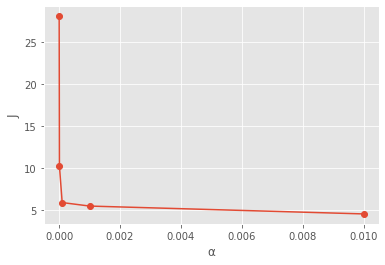

In [15]:
iterations = 1000
J = []
for α in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]:
    β, J_history = get_gradient_descent(β, X, y, α, iterations)
    J += [J_history[-1]]
print (J)
plt.plot([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1], J, 'o-')
plt.xlabel("α")
plt.ylabel("J")
plt.show()
# print (f"α = {α}",f"J = {J_history[-1]}")
# plotcost_functionVSiterations(J_history, iterations)

## 1.5 Data Import & Manipulation Using Pandas
https://codereview.stackexchange.com/questions/171144/gradient-descent-for-linear-regression-using-numpy-pandas<br\>
http://anwarruff.com/the-linear-regression-cost-function-in-matrix-form/

### 1.5.1 Data Extraction and Transformation Using Pandas

In [17]:
def data2df(file_path):
    df = pd.read_csv(
        file_path,
        header=None,
        names=['x1', 'y'])
    df.insert(0, 'x0', 1)
    nRows, nColumns = df.shape
    X = df[['x0','x1']]
    y = df[['y']]
    β = pd.DataFrame(np.zeros(X.shape[1]), columns = ['β'])
    return β, X, y

β_pd, X_pd, y_pd = data2df(file_path_1)

X_pd.head()
y_pd.head()
β_pd.head()
print(f"samples # {X_pd.shape[0]}")

samples # 97


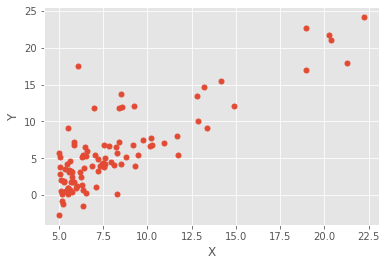

In [18]:
plt.plot(X_pd['x1'], y_pd, 'o', ms = 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [19]:
def plot_regression_pd(β, X, y):
#     y_fit = β_fit[0][0] + β_fit[1][0]*X[:,1:]
    y_fit = np.dot(X,β_fit)
    MSE = np.sum((y - y_fit)**2)/y_pd.shape[0]

    plt.plot(X['x1'], y, 'o', X['x1'], y_fit, '-')
    plt.xlabel("X")
    plt.ylabel("Y")
    print (f"\tβ_0 {β_fit[0][0]:.5f}\n",
           f"\tβ_1 {β_fit[1][0]:.5f}\n",
           f"\tY = {β_fit[0][0]:.2f} + {β_fit[1][0]:.2f} * X\n"
           f"\tMSE {MSE[0]:.2f}"
          )
    return plt.show()

### 1.5.2 Analytical Approach Using Pandas

	β_0 -3.24140
 	β_1 1.12729
 	Y = -3.24 + 1.13 * X
	MSE 9.03


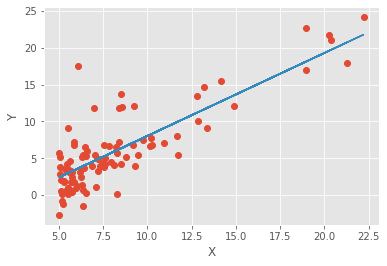

In [20]:
β_fit_pd = linear_regression_analytical(X_pd, y_pd)
plot_regression_pd(β_fit_pd, X_pd, y_pd)

### 1.5.3 Gradient-Descent Approach Using Pandas

	β_0 -3.24140
 	β_1 1.12729
 	Y = -3.24 + 1.13 * X
	MSE 9.03


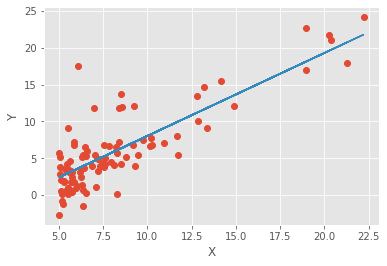

In [22]:
α = 0.01
iterations = 1000

β_fit_pd = get_gradient_descent(β_pd, X_pd, y_pd, α, iterations)
plot_regression_pd(β_fit_pd[0], X_pd, y_pd)
# costVector = gradient_descent(β, X, y, α, iterations)[1]
# plot_convergence(costVector, iterations)

# 2 Multivariate Linear Regression

In [23]:
file_path = '../course_materials/ex1data2.txt'

## 2.1 Data Extraction and Transformation

In [25]:
df = pd.read_csv(file_path, header = None, names = ['x1', 'x2', 'y'])
df.insert(0, 'x0', 1)
nRows, nColumns = df.shape
X = df[['x0','x1', 'x2']]
y = df[['y']]
β_pd = pd.DataFrame(np.zeros(X.shape[1]), columns = ['β'])

df.head()
X.head()
y.head()
β_pd.head()
print(f"samples # {df.shape[0]}")

samples # 47
